###This file will have more deadheading analysis
At least at the beginning I'll be looking at busruns that are 50% plus deadheading 

In [9]:
import pandas as pd
schedule = pd.read_csv('../../data/UW_Trip_Data_4mo_QC_capacity.csv')
dh_data = pd.read_csv('../../data/4mo_deadhead_results.csv')

#####Subset data and attempt to fix the run type issue (still doesn't work)

In [50]:
fiftiers = dh_data[dh_data.PctDeadhead > .5]
fiftiers['Run'] = fiftiers['Run'].astype('str')

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


#####lamba function to get the number of actions each bus run in fitiers has

In [23]:
def getLenRuns(date, run):
    print(date)
    print(run)
    return(len(schedule[(schedule.ServiceDate == date) & (schedule.Run == run)]))

In [51]:
numActions = fiftiers.apply(lambda x: getLenRuns(x.ServiceDate, x.Run), axis=1)
numActions

0015-01-01
9711
0015-01-01
9713
0015-01-01
9730
0015-01-01
8710
0015-03-07
999R
0015-03-08
999R
0015-04-18
999R
0015-04-19
999R
0015-04-25
999R
0015-04-26
999R
0015-04-02
700LD
0015-04-30
700LD
0015-01-01
PEB1
0015-02-01
PEB1
0015-01-13
680SEB
0015-02-05
680SEB
0015-02-23
680SEB
0015-03-05
680SEB
0015-04-06
680SEB
0015-03-04
180SEB
0015-04-02
180SEB
0015-04-29
180SEB
0015-03-16
181SEB
0015-04-14
181SEB
0015-04-08
184SEB
0015-01-08
190TRN
0015-01-09
190TRN
0015-03-06
190TRN
0015-03-24
480SEB
0015-03-17
483SEB
0015-03-27
483SEB
0015-03-17
580SEB
0015-03-27
582SEB
0015-03-12
583SEB
0015-03-27
583SEB
0015-03-27
584SEB
0015-04-02
584SEB
0015-01-13
681SEB
0015-04-30
698LD
0015-03-19
699LD
0015-04-20
699LD
0015-02-12
682SEB
0015-03-16
683SEB
0015-03-17
683SEB
0015-04-01
683SEB
0015-04-06
683SEB
0015-02-05
980SEB
0015-02-23
580BTW
0015-04-21
182SEB
0015-01-03
BD1
0015-01-09
BD1
0015-02-18
BD1
0015-02-20
BD1
0015-02-25
BD1
0015-03-13
BD1
0015-03-31
BD1
0015-04-01
BD1
0015-04-30
BD1
0015-01-26
B

9        17
12       18
23       17
35       26
56       22
57       22
66       25
67       25
68       24
69       23
114      12
126      19
128      13
150      16
214      27
223      16
235      19
239      26
257      15
289      11
305      29
321      18
337      21
355      11
388      16
391      14
392       7
396       8
438      15
563      13
         ..
24378    22
24379    22
24430    13
24446    11
24459    14
24480    12
24510    23
24715    28
24716    29
24718    28
24723    26
24760    25
24761    39
24794    27
24810    28
24820    29
24849    23
24853    23
24907    24
24910    24
24915    12
24958    29
24969    38
24996    32
25020    26
25049    33
25161    13
25184    17
25185    12
25192    12
dtype: int64

In [52]:
fiftiers['NumActions'] = numActions
fiftiers

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,ServiceDate,Run,CostProxy,PctDeadhead,NumActions
9,0015-01-01,9711,5500.000000,0.586091,17
12,0015-01-01,9713,5160.000000,0.568572,18
23,0015-01-01,9730,3240.833333,0.581589,17
35,0015-01-01,8710,3079.600000,0.506202,26
56,0015-03-07,999R,4750.625000,0.514248,22
57,0015-03-08,999R,5228.857143,0.500847,22
66,0015-04-18,999R,4133.333333,0.616129,25
67,0015-04-19,999R,4560.000000,0.572880,25
68,0015-04-25,999R,4963.500000,0.501209,24
69,0015-04-26,999R,4845.750000,0.577465,23


#####Plot data

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

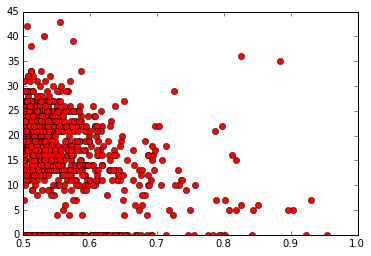

In [53]:
plt.plot(fiftiers.PctDeadhead, fiftiers.NumActions, 'ro')
plt.show()

In [54]:
fiftiers[fiftiers.NumActions == 0]

,ServiceDate,Run,CostProxy,PctDeadhead,NumActions
2396,0015-01-06,6013,3600.000000,0.604444,0
2397,0015-01-08,6013,3412.500000,0.553956,0
2481,0015-02-03,6020,2602.000000,0.532063,0
2500,0015-03-02,6020,3727.500000,0.500872,0
2537,0015-04-24,6020,3722.750000,0.589618,0
2606,0015-04-09,6021,2678.571429,0.505813,0
2726,0015-02-16,6023,3810.000000,0.529462,0
2767,0015-04-17,6023,3006.000000,0.501830,0
2839,0015-04-15,6024,3271.111111,0.500272,0
2893,0015-03-16,6030,3300.000000,0.519293,0


Something is definitely wrong here

In [64]:
len(schedule[(schedule.ServiceDate == '0015-03-23') & (schedule.Run == 5071)])

23